In [149]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-perf/Student_Performance.csv


In [150]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
df = pd.read_csv('/kaggle/input/student-perf/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99.0,Yes,9.0,1.0,91.0
1,4,82.0,No,4.0,2.0,65.0
2,8,51.0,Yes,7.0,2.0,45.0
3,5,52.0,Yes,5.0,2.0,36.0
4,7,75.0,No,8.0,5.0,66.0


In [152]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,9985.000000,9978.000000,9993.000000,9995.000000
mean,4.992900,69.442163,6.531269,4.583709,55.223612
std,2.589309,17.342610,1.695667,2.867752,19.213183
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [153]:
df.duplicated().sum()

125

In [154]:
df = df.drop_duplicates()

In [155]:
df.isna().sum().sort_values()

Hours Studied                        0
Extracurricular Activities           2
Performance Index                    5
Sample Question Papers Practiced     7
Previous Scores                     15
Sleep Hours                         22
dtype: int64

In [156]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0])
df['Performance Index'] = df['Performance Index'].fillna(df['Performance Index'].mean())
df['Sample Question Papers Practiced'] = df['Sample Question Papers Practiced'].fillna(df['Sample Question Papers Practiced'].mean())
df['Previous Scores'] = df['Previous Scores'].fillna(df['Previous Scores'].mean())
df['Sleep Hours'] = df['Sleep Hours'].fillna(df['Sleep Hours'].mean())

df.isna().sum().sort_values()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [157]:
print(df.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


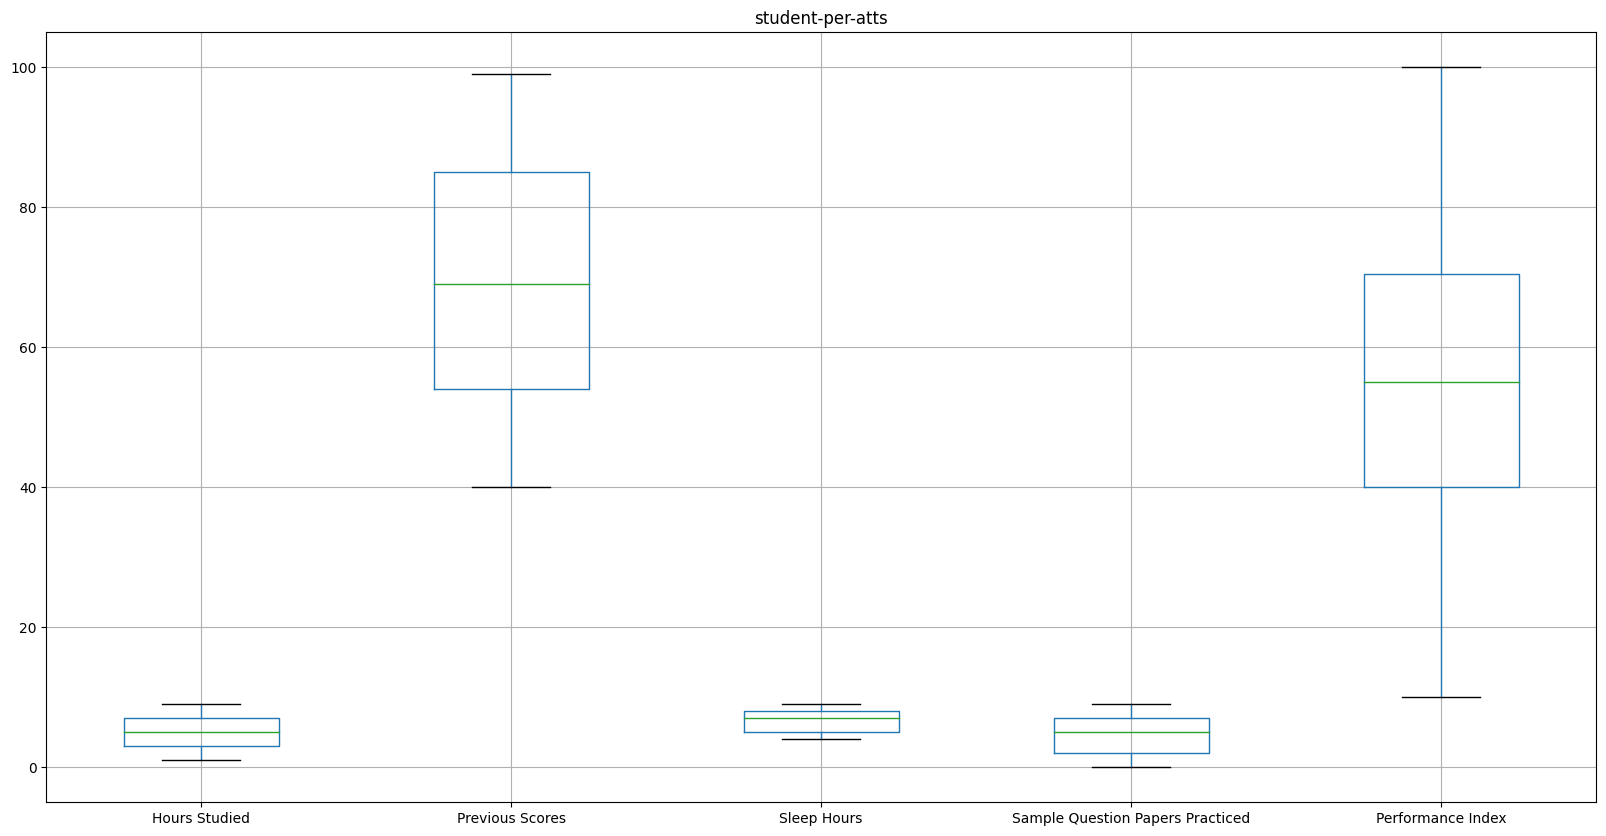

In [158]:
atts = list =['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
plt.figure(figsize=(20,10))
df[atts].boxplot()
plt.title('student-per-atts')
plt.show()

In [159]:
x= df.drop("Performance Index", axis=1).values 
y = df["Performance Index"].values

In [160]:

df["Binary_Extracurricular_Active"]=df["Extracurricular Activities"].apply(lambda val: 1 if val == "Yes" else 0) 
df[["Binary_Extracurricular_Active","Extracurricular Activities"]]
x = df.drop(["Extracurricular Activities","Performance Index"], axis=1).values

In [161]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(x,y,test_size=0.3)

In [162]:
#import linearRegression
from sklearn.linear_model import LinearRegression
lr_mdl=LinearRegression()
lr_mdl.fit(X_train, ytrain)
lr_mdl

LinearRegression()

In [163]:
y_pred=lr_mdl.predict(X_test)

In [164]:
y_pred[:10]

array([74.07904766, 77.94043444, 77.00037876, 40.42653214, 83.40535882,
       65.59874444, 54.11329506, 22.18892971, 58.62441936, 76.12430799])

In [165]:
ytest[:10]

array([74., 80., 78., 42., 83., 65., 56., 19., 61., 75.])

In [166]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, y_pred)
mse

5.300685760460759

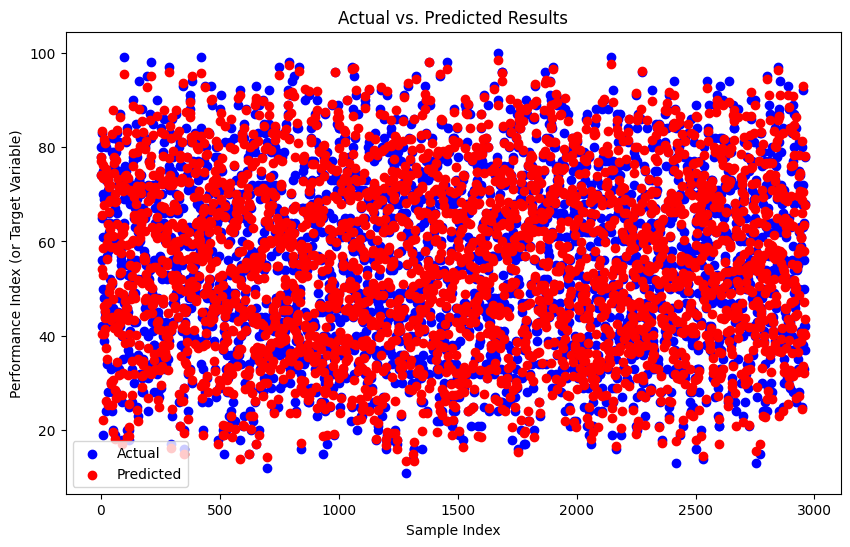

In [167]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(ytest)), ytest, color='blue', label='Actual')
plt.scatter(range(len(ytest)), y_pred, color='red', label='Predicted')
plt.title('Actual vs. Predicted Results')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index (or Target Variable)')
plt.legend()
plt.show()

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

print('r2:0.4f')
print('mae:.4f')
print('rmse:.4f')

r2:0.4f
mae:.4f
rmse:.4f
